# The plot module: visualizing grain size distributions

The plot module includes a series of plots to visualize and characterize grain populations. Before we get into the details, let's run the GrainSizeTools script and load the example dataset.

In [1]:
# Load the script first (change the path to GrainSizeTools_script.py accordingly!)
%run C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: v3.0RC0 (2020-04-23)
Documentation: https://marcoalopez.github.io/GrainSizeTools/

Type get.functions_list() to get a list of the main methods



In [2]:
# Load the example dataset
filepath = 'C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/DATA/data_set.txt'
dataset = pd.read_csv(filepath, sep='\t')  # Import the example dataset
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)  # estimate ECD
dataset

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,diameters
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937,14.149803
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972,51.210889
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972,49.974587
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947,83.137121
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970,21.821815
...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2657,452.50,0.789,28.504,1368.0,1565.5,127.875,22.500,1.235,0.810,0.960,24.002935
2657,2658,1081.25,0.756,47.909,1349.5,1569.5,108.246,31.363,1.446,0.692,0.960,37.103777
2658,2659,513.50,0.720,32.962,1373.0,1586.0,112.286,20.496,1.493,0.670,0.953,25.569679
2659,2660,277.75,0.627,29.436,1316.0,1601.5,159.102,17.002,1.727,0.579,0.920,18.805379


As already mentioned, the plot module allows several types of visualizations. All methods of the *plot* module can be invoked by writing ```plot.*```, where * refers to the plot to be used.

> 👉 If you write ``plot.`` and then press the tab key a menu will pop up with all the methods implemented in the plot module

The main method is ```plot.distribution()```. The method allows to visualize the grain size population using the histogram and/or the kernel density estimate (KDE) and provides the location of the different averages. The simplest example of use would be to pass the column with the diameters as follows:

Number of classes =  45
binsize =  3.41
KDE bandwidth =  4.01


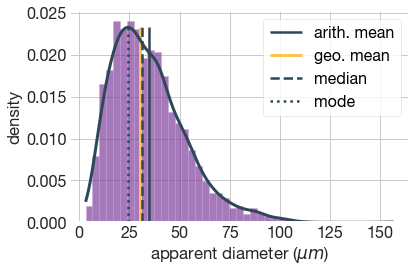

In [3]:
fig, ax = plot.distribution(dataset['diameters'])  # this is just to show the plot in the notebook

By default, the ```plot.distribution()``` function returns a plot containing the histogram and the kernel density values of the distribution and the location of the main averages estimated by the function ``summarize`` by default.

> 👉 Note that when calling ``plot.distribution()`` we store two variables ``fig`` and ``ax``. The variable ``fig`` stems for figure and ``ax`` for the axe to the current figure*. This is not compulsory. Indeed, you can directly write ``plot.distribution(dataset['diameters'])`` to get same result. However, if you want to save or tweak the plot later you will need the ``fig`` and ``ax`` variables (or any name you prefer). The variable ``fig``, for example, allows you to save the plot (see an example below).
>
> *If you can't tell the difference between a figure and an axe check the elements of a figure here: https://matplotlib.org/3.2.1/gallery/showcase/anatomy.html

In [4]:
# If you want to save the plot in your hard disk
fig.savefig("test_distribution.png", dpi=150)

Note that the format of image (e.g. 'png', 'pdf', 'tif', 'svg') will depend on the extension of the file (after the dot) you define.
Some interesting parameters when saving a figure are:
- ``dpi`` : the resolution in dots per inch
- ``facecolor`` : the facecolor of the figure, e.g. 'white', 'black', etc.
- ``quality`` : the image quality from 1 (worst) to 95 (best). Only applicable if format is *jpg*.

In [5]:
?plot.distribution

Signature:
plot.distribution(
    data,
    plot=('hist', 'kde'),
    avg=('amean', 'gmean', 'median', 'mode'),
    binsize='auto',
    bandwidth='silverman',
    **fig_kw,
)
Docstring:
Return a plot with the ditribution of (apparent or actual) grain sizes
in a dataset.

Parameters
----------
data : array_like
    the size of the grains

plot : string, tuple or list; optional
    the type of plot, either histogram ('hist'), kernel density estimate
    ('kde') or both ('hist', 'kde'). Default is both.

avg : string, tuple or list; optional
    the central tendency measures o show, either the arithmetic ('amean')
    or geometric ('gmean') means, the median ('median'), and/or the
    KDE-based mode ('mode'). Default all averages.

binsize : string or positive scalar; optional
    If 'auto', it defines the plug-in method to calculate the bin size.
    When integer or float, it directly specifies the bin size.
    Default: the 'auto' method.

    | Available plug-in methods:
    | 'auto' (

>TODO:
>- Explain all parameters
>- Examples of histogram vs KDE
>- Example of a log-transformed distribution


## Testing lognormality

Sometimes can be helpful to test whether the data follows or deviates from a lognormal distribution. For example, to find out if the data set is suitable for applying the two-step stereological method or which confidence interval method is best for the arithmetic mean. The script use two methods to test whether the distribution of grain size follows a lognormal distribution. One is a visual method named [quantile-quantile (q-q) plots]([https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot](https://en.wikipedia.org/wiki/Q–Q_plot)) and the other is a quantitative test named the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro–Wilk_test). For this we use the GrainSizeTools function ```test_lognorm``` as follows :

Shapiro-Wilk test (lognormal):
0.99, 0.12 (test statistic, p-value)
It looks like a lognormal distribution
(⌐■_■)


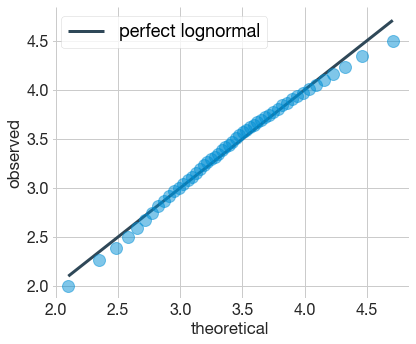

In [6]:
fig2, ax = plot.qq_plot(dataset['diameters'], figsize=(6, 5))

In [7]:
fig2.savefig("qqplot.png", dpi=150)

## The area-weighted distribution

The plot module also allows plotting the area-weighted distribution of grain sizes using the function ``area_weighted()``. This function also returns some basic statistics such as the area-weighted mean and the histogram features. For example:

DESCRIPTIVE STATISTICS
Area-weighted mean grain size = 53.88 microns
HISTOGRAM FEATURES
The modal interval is 40.85 - 44.26 microns
The number of classes are 46
The bin size is 3.40 according to the auto rule


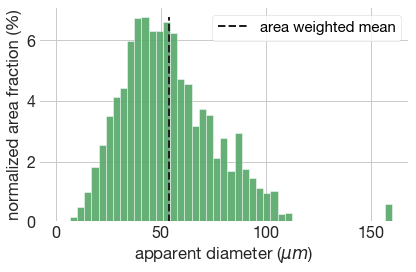

In [8]:
fig3, ax = plot.area_weighted(dataset['diameters'], dataset['Area'])

In [9]:
fig3.savefig("area_weighted.png", dpi=150)

>  👉 ***When to use and not to use the area-weighted approach?***
>
> You **should not use** the area-weighted mean for the calibration of paleopiezometers or for the comparison of grain size populations, as this is a poorly optimised central tendency measure ([Lopez-Sanchez, 2020](https://doi.org/10.1016/j.jsg.2020.104042)). On the other hand, the area-weighted distribution is useful to visualize...TODO

## Normalized grain size distributions

Normalized grain size distributions are representations of the entire grain population standardized using an average of the population, usually the arithmetic mean or the median. The advantage of normalized distribution is that it allows the comparison of grain size distribution with different average grain sizes. For example, to check whether two or more grain size distributions have similar shapes we can compare their standard deviations (SD) or their interquartile ranges (IQR). In this case, the method ``plot.normalized()`` display the distribution on a logarithmic scale and provides the SD or IQR of the normalized population depending on the chosen normalizing factor.

Normalized SD = 0.165
KDE bandwidth =  0.04


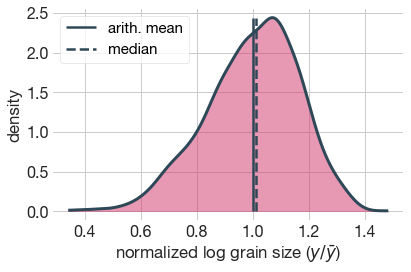

In [10]:
fig4, ax = plot.normalized(dataset['diameters'])

In [11]:
fig4.savefig("normalized_distrib.png", dpi=150)

Let's play by changing some of the function parameters. In this case, we are going to establish the median as an alternative normalization factor, and we are also going to smooth the kernel density estimator by increaing the value from 0.04 (estimated according to the Silverman rule) to 0.1. In addition, we will set the appearance of the figure using the figsize parameter, where the values within the parentheses are the (width, height) in inches.

Normalized IQR = 0.221
KDE bandwidth =  0.1


(<Figure size 432x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2812fda4748>)

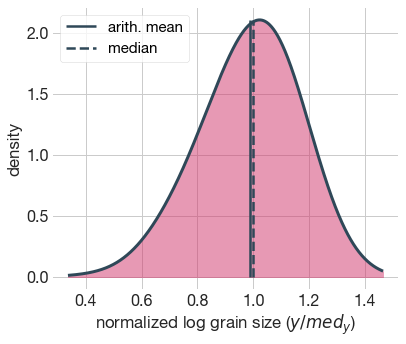

In [12]:
plot.normalized(dataset['diameters'], avg='median', bandwidth=0.1, figsize=(6, 5))

Note that in this case, the method returns the normalized inter-quartile range (IQR) rather than the normalized standard deviation. Also, note that the kernel density estimate appears smoother resembling an almost perfect normal distribution.